```
Sourajita Dewasi                                            Enrollment ID: 191000050
B. Tech CSE (6th Semester)                                  Predictive Analytics(Lab Project 2&3)
```



In [ ]:
#importing libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [ ]:
#importing dataset iris from sklearn datasets
iris=load_iris()
#setting independent variables X and target variables y
X=iris.data[:,2:] #petal length and width
y=iris.target     #petal class
# summarize the dataset
print(X.shape, y.shape)

(150, 2) (150,)


In [ ]:
# define the model
model = AdaBoostClassifier()

In [ ]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.949 (0.051)


## Changing depth

In [ ]:
results, names, accuracy, standard_dev = list(), list(), list(), list()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
models=dict()
for i in range(1,11):
  #defining base model
  base_model = DecisionTreeClassifier(max_depth=i)
  #define ensemble model
  models[i]=AdaBoostClassifier(base_estimator=base_model)
  #evaluate the model
  cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(models[i], X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  #report performance
  print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
  #store the results
  results.append(n_scores)
  names.append(i)
  accuracy.append(mean(n_scores))
  standard_dev.append(std(n_scores))

Accuracy: 0.949 (0.051)
Accuracy: 0.951 (0.054)
Accuracy: 0.944 (0.055)
Accuracy: 0.944 (0.055)
Accuracy: 0.949 (0.056)
Accuracy: 0.944 (0.055)
Accuracy: 0.944 (0.055)
Accuracy: 0.944 (0.055)
Accuracy: 0.938 (0.051)
Accuracy: 0.940 (0.058)


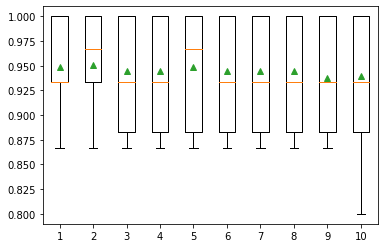

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

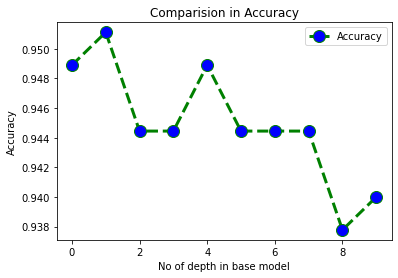

In [ ]:
import matplotlib.pyplot as plt
# plotting the points
plt.plot(accuracy, label='Accuracy', color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.title("Comparision in Accuracy")
plt.xlabel('No of depth in base model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

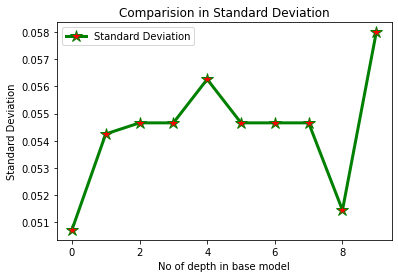

In [ ]:
plt.plot(standard_dev, label='Standard Deviation', color='green', linestyle='-', linewidth = 3, marker='*', markerfacecolor='red', markersize=12)
plt.title("Comparision in Standard Deviation")
plt.xlabel('No of depth in base model')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

In conclusion, we see the Accuracy of the model is best at max_depth=1 and Standard Deviation of the model is best at max_depth=7 followed by max_depth=1. Since, accuracy is relatively poor at 7, we will consider the max_depth in this case best at 1. Also, by default the base_estimator when assigned 'None', the max_depth=1.

## Changing number of trees

In [ ]:
results, names, accuracy, standard_dev = list(), list(), list(), list()

In [ ]:
no_of_trees = [10,20,100,200,500,1000]

In [ ]:
models=dict()
for i in range(0,6):
  #define ensemble model
  models[i]=AdaBoostClassifier(n_estimators=no_of_trees[i])
  #evaluate the model
  cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(models[i], X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  #report performance
  print('Number of Trees', no_of_trees[i])
  print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
  #store the results
  results.append(n_scores)
  names.append(i)
  accuracy.append(mean(n_scores))
  standard_dev.append(std(n_scores))

Number of Trees 10
Accuracy: 0.949 (0.051)
Number of Trees 20
Accuracy: 0.953 (0.049)
Number of Trees 100
Accuracy: 0.953 (0.049)
Number of Trees 200
Accuracy: 0.953 (0.049)
Number of Trees 500
Accuracy: 0.953 (0.049)
Number of Trees 1000
Accuracy: 0.953 (0.049)


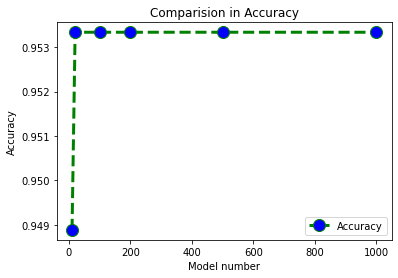

In [ ]:
# plotting the points
plt.plot(no_of_trees, accuracy, label='Accuracy', color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.title("Comparision in Accuracy")
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

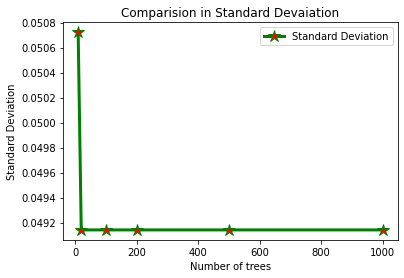

In [ ]:
plt.plot(no_of_trees, standard_dev, label='Standard Deviation', color='green', linestyle='-', linewidth = 3, marker='*', markerfacecolor='red', markersize=12)
plt.title("Comparision in Standard Devaiation")
plt.xlabel('Number of trees')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

In conclusion, we see the Accuracy and Standard Deviation  of the model is best at no_of_trees=20 and then it doesn't change it's value after that. Hence, base_estimator='None' and no_of_trees=20. We don't apply more number of trees than 20 to make it computationally fast with less iterations even when the accuracy doesn't change.

## Changing Learning Rate

In [ ]:
results, names, accuracy, standard_dev = list(), list(), list(), list()

In [ ]:
learning_rate=[0.0001, 0.001, 0.01, 0.05, 0.1, 1.0, 2.0, 5.0]

In [ ]:
models=dict()
for i in range(0,8):
  #define ensemble model
  models[i]=AdaBoostClassifier(n_estimators=20, learning_rate=learning_rate[i])
  #evaluate the model
  cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(models[i], X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  #report performance
  print('Learning Rate', learning_rate[i])
  print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
  #store the results
  results.append(n_scores)
  names.append(i)
  accuracy.append(mean(n_scores))
  standard_dev.append(std(n_scores))

Learning Rate 0.0001
Accuracy: 0.667 (0.000)
Learning Rate 0.001
Accuracy: 0.667 (0.000)
Learning Rate 0.01
Accuracy: 0.949 (0.054)
Learning Rate 0.05
Accuracy: 0.922 (0.049)
Learning Rate 0.1
Accuracy: 0.922 (0.049)
Learning Rate 1.0
Accuracy: 0.953 (0.049)
Learning Rate 2.0
Accuracy: 0.916 (0.091)
Learning Rate 5.0
Accuracy: 0.489 (0.208)


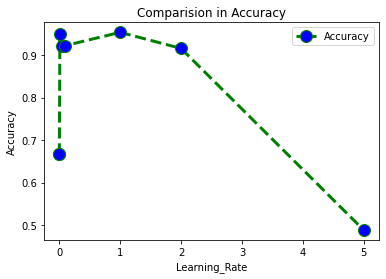

In [ ]:
# plotting the points
plt.plot(learning_rate, accuracy, label='Accuracy', color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.title("Comparision in Accuracy")
plt.xlabel('Learning_Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

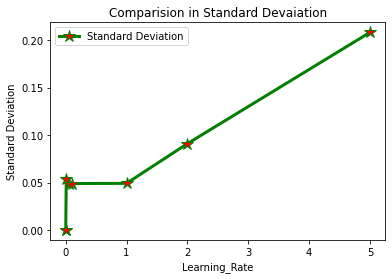

In [ ]:
plt.plot(learning_rate, standard_dev, label='Standard Deviation', color='green', linestyle='-', linewidth = 3, marker='*', markerfacecolor='red', markersize=12)
plt.title("Comparision in Standard Devaiation")
plt.xlabel('Learning_Rate')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

In conclusion, we see the Accuracy and Standard Deviation  of the model is best at learning_rate=1.0 and in the close values around it, there is usually an decrease in the accuracy. Hence, for base_estimator='None' and no_of_trees=20, the best learning_rate is 1.0. Also, by default the learning_rate when not assigned any value, is 1.0.

## Changing Base Algorithm 

In [ ]:
from sklearn.linear_model import LogisticRegression
# define the model
model = AdaBoostClassifier(base_estimator=LogisticRegression())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.951 (0.045)




```
Hence at -------
learning rate = 1.0
base_estimator = Decision Tree
max_depth = 1.0
no of trees = 20
we get the best accuracy at 95.3% and standard deviation = 0.054
```


### Exploring Error and Sigma For Each Decision Stump

In [ ]:
#importing libraries to build decision stump and perform adaboost from scratch
from sklearn import tree
from math import log,exp
from random import sample
import numpy as np
import random

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0.5, 0.75, 'X[2] <= 4.95\ngini = 0.498\nsamples = 100\nvalue = [47, 53]'),
 Text(0.25, 0.25, 'gini = 0.191\nsamples = 56\nvalue = [6, 50]'),
 Text(0.75, 0.25, 'gini = 0.127\nsamples = 44\nvalue = [41, 3]')]

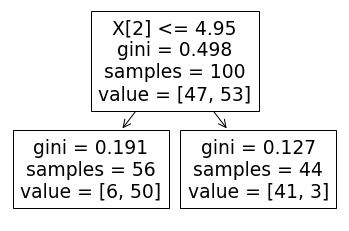

In [ ]:
#importing file
iris = pd.read_csv("Iris.csv")  
#considering only two classes
df = iris[(iris['Species'] == 'Iris-versicolor') | (iris['Species'] == 'Iris-virginica')]
#replacing the two classes with +1 and -1
df['Label'] = df['Species'].replace(to_replace = ['Iris-versicolor','Iris-virginica'], value=[1,-1])
#Dropping the Species column
df = df.drop('Species', axis = 1)
#Assigning equal weights to every dataset rows
df['probR1'] = 1/(df.shape[0])
#simple random sample with replacement
random.seed(10)
df1 = df.sample(len(df), replace = True, weights = df['probR1'])
#X_train and Y_train split
X_train = df1.iloc[0:len(iris),1:5]
y_train = df1.iloc[0:len(iris),5]
#fitting the Decision Tree model with depth one
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)
#plotting tree for round 1 boosting
tree.plot_tree(clf)



In [ ]:
#prediction
y_pred = clf_gini.predict(df.iloc[0:len(iris),1:5])
#adding a column pred1 after the first round of boosting
df['pred1'] = y_pred
#misclassified = 0 if the label and prediction are same
df.loc[df.Label != df.pred1, 'misclassified'] = 1
df.loc[df.Label == df.pred1, 'misclassified'] = 0
#error calculation
e1 = sum(df['misclassified'] * df['probR1'])
#sigma calculation
sigma1 = 0.5*log((1-e1)/e1)
#print sigma and error
print("Error of First Iteration", e1)
print("Sigma of First Iteration", sigma1)


Error of First Iteration 0.08
Sigma of First Iteration 1.2211735176846021


In [ ]:
#update weight
new_weight = df['probR1']*np.exp(-1*sigma1*df['Label']*df['pred1'])
#normalized weight
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)
df['prob2'] = round(normalized_weight,4)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label,probR1,pred1,misclassified,prob2
50,51,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054
51,52,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054
52,53,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0054
53,54,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054
54,55,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0054
146,147,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0054
147,148,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0054
148,149,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0054


[Text(0.5, 0.75, 'X[3] <= 1.75\ngini = 0.498\nsamples = 100\nvalue = [53, 47]'),
 Text(0.25, 0.25, 'gini = 0.177\nsamples = 51\nvalue = [5, 46]'),
 Text(0.75, 0.25, 'gini = 0.04\nsamples = 49\nvalue = [48, 1]')]

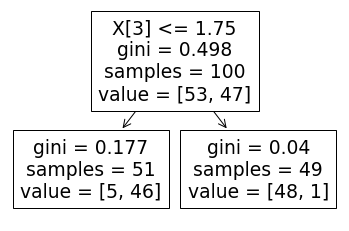

In [ ]:
#round 2
random.seed(20)
df2 = df.sample(len(df), replace = True, weights = df['prob2'])
df2 = df2.iloc[:,0:6]
X_train = df2.iloc[0:len(iris),1:5]
y_train = df2.iloc[0:len(iris),5]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(df.iloc[0:len(iris),1:5])
#adding a column pred2 after the second round of boosting
df['pred2'] = y_pred
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [ ]:
#adding a field misclassified2
df.loc[df.Label != df.pred2, 'misclassified2'] = 1
df.loc[df.Label == df.pred2, 'misclassified2'] = 0
# calculation of error
e2 = sum(df['misclassified2'] * df['prob2'])
#calculation of alpha
sigma2 = 0.5*log((1-e2)/e2)
#print sigma and error
print("Error of Second Iteration", e2)
print("Sigma of Second Iteration", sigma2)

Error of Second Iteration 0.08950000000000001
Sigma of Second Iteration 1.1598776369434263


In [ ]:
#update weight
new_weight = df['prob2']*np.exp(-1*sigma2*df['Label']*df['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)
df['prob3'] = round(normalized_weight,4)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3
50,51,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.003
51,52,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003
52,53,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003
53,54,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.003
54,55,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0054,-1,0.0,0.003
146,147,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0054,-1,0.0,0.003
147,148,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0054,-1,0.0,0.003
148,149,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0054,-1,0.0,0.003


[Text(0.5, 0.75, 'X[3] <= 1.65\ngini = 0.375\nsamples = 100\nvalue = [75, 25]'),
 Text(0.25, 0.25, 'gini = 0.48\nsamples = 25\nvalue = [10, 15]'),
 Text(0.75, 0.25, 'gini = 0.231\nsamples = 75\nvalue = [65, 10]')]

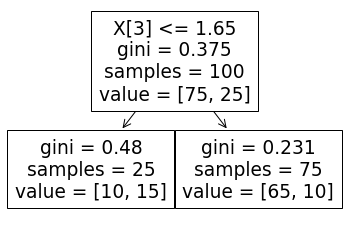

In [ ]:
#round 3
random.seed(30)
df3 = df.sample(len(df), replace = True, weights = df['prob3'])
df3 = df3.iloc[:,0:6]
X_train = df3.iloc[0:len(iris),1:5]
y_train = df3.iloc[0:len(iris),5]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred3 after the third round of boosting
y_pred = clf_gini.predict(df.iloc[0:len(iris),1:5])
df['pred3'] = y_pred
#plotting tree for round 3 boosting
tree.plot_tree(clf)

In [ ]:
#adding a field misclassified2
df.loc[df.Label != df.pred2, 'misclassified3'] = 1
df.loc[df.Label == df.pred2, 'misclassified3'] = 0
# calculation of error
e3 = sum(df['misclassified2'] * df['prob2'])
#calculation of alpha
sigma3 = 0.5*log((1-e3)/e3)
#print sigma and error
print("Error of Third Iteration", e3)
print("Sigma of Third Iteration", sigma3)


Error of Third Iteration 0.08950000000000001
Sigma of Third Iteration 1.1598776369434263


In [ ]:
#update weight
new_weight = df['prob3']*np.exp(-1*sigma3*df['Label']*df['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)
df['prob4'] = round(normalized_weight,4)


[Text(0.5, 0.75, 'X[1] <= 2.85\ngini = 0.455\nsamples = 100\nvalue = [65, 35]'),
 Text(0.25, 0.25, 'gini = 0.15\nsamples = 61\nvalue = [56, 5]'),
 Text(0.75, 0.25, 'gini = 0.355\nsamples = 39\nvalue = [9, 30]')]

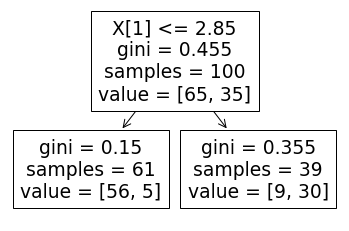

In [ ]:
#Round 4
random.seed(40)
df4 = df.sample(len(df), replace = True, weights = df['prob4'])
df4 = df4.iloc[:,0:6]
X_train = df4.iloc[0:len(iris),1:5]
y_train = df4.iloc[0:len(iris),5]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred3 after the third round of boosting
y_pred = clf_gini.predict(df.iloc[0:len(iris),1:5])
df['pred4'] = y_pred
#plotting tree for round 3 boosting
tree.plot_tree(clf)

In [ ]:
#adding a field misclassified4
df.loc[df.Label != df.pred4, 'misclassified4'] = 1
df.loc[df.Label == df.pred4, 'misclassified4'] = 0
#error calculation
e4 = sum(df['misclassified4'] * df['prob4']) 
# calculation of performance (alpha)
sigma4 = 0.5*log((1-e4)/e4)
#print sigma and error
print("Error of Fourth Iteration", e4)
print("Sigma of Fourth Iteration", sigma4)

Error of Fourth Iteration 0.2110999999999998
Sigma of Fourth Iteration 0.659153807623385


In [ ]:
#printing the alpha value which is used in each round of boosting
print("The Sigma and Error in First Round", sigma1, e1)
print("The Sigma and Error in Second Round",sigma2, e2)
print("The Sigma and Error in Third Round", sigma3, e3)
print("The Sigma and Error in Fourth Round", sigma3, e4)

The Sigma and Error in First Round 1.2211735176846021 0.08
The Sigma and Error in Second Round 1.1598776369434263 0.08950000000000001
The Sigma and Error in Third Round 1.1598776369434263 0.08950000000000001
The Sigma and Error in Fourth Round 1.1598776369434263 0.2110999999999998


In [ ]:
#final prediction
t = sigma1 * df['pred1'] + sigma2 * df['pred2'] + sigma3 * df['pred3'] + sigma4 * df['pred4']
#sign of the final prediction
np.sign(list(t))
#Final Prediction in Column
df['final_pred'] = np.sign(list(t))
df



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4,final_pred
50,51,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.003,1,0.0,0.0011,1,0.0,1.0
51,52,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003,1,0.0,0.0011,1,0.0,1.0
52,53,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003,1,0.0,0.0011,1,0.0,1.0
53,54,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.003,1,0.0,0.0011,-1,1.0,1.0
54,55,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003,1,0.0,0.0011,-1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0054,-1,0.0,0.003,-1,0.0,0.0011,1,1.0,-1.0
146,147,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0054,-1,0.0,0.003,-1,0.0,0.0011,-1,0.0,-1.0
147,148,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0054,-1,0.0,0.003,-1,0.0,0.0011,1,1.0,-1.0
148,149,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0054,-1,0.0,0.003,-1,0.0,0.0011,1,1.0,-1.0


In [ ]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
c=confusion_matrix(df['Label'], df['final_pred'])
c

array([[45,  5],
       [ 2, 48]])

In [ ]:
#Overall Accuracy
accuracy=(c[0,0]+c[1,1])/np.sum(c)*100
print("Accuracy", accuracy)

Accuracy 93.0


In [ ]:
sigma = [sigma1, sigma2, sigma3, sigma4]
error = [e1,e2,e3, e4]

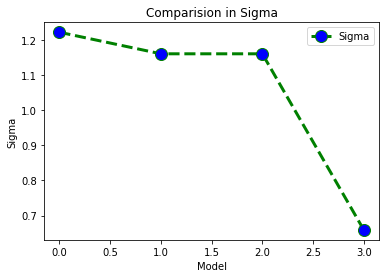

In [ ]:
# plotting the points
plt.plot(sigma, label='Sigma', color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.title("Comparision in Sigma")
plt.xlabel('Model')
plt.ylabel('Sigma')
plt.legend()
plt.show()

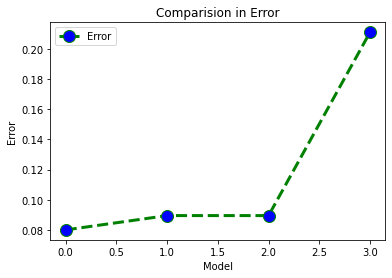

In [ ]:
# plotting the points
plt.plot(error, label='Error', color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.title("Comparision in Error")
plt.xlabel('Model')
plt.ylabel('Error')
plt.legend()
plt.show()

## Conclusion:
1. *AdaBoost ensemble is an boosting algorithm created from decision trees added sequentially to the model.*
2. *A high learning rate can cause the model to converge too rapidly to a sub-optimal solution rather than in the actual optimal solution, while a too-low learning rate can cause the process to stall.This happened in this case too where we saw at learning rates 0.001 and 0.01 the accuracy was as low as 0.067 and at 5.0 it went down to 0.489. Hence, we checked around the numbers such as 0.1 and 1.0 to get a better accuracy if possible since these two gave the best accuracy.*
3. *The number of trees added to the model must be high for the model to work well. But in the mean time we need to take care about the computation time. It is a tradeoff between accuracy and computation time. In our case, the accuracy didn't increase after 20 trees.*
4. *A decision tree with one level is used as the weak learner by default. It is known as Decision Stump. But we can improve the ensembles or make them less weak by changing the base_estimators in DecisionTreeClassifier. This is also a tradeoff between accuracy and compuattion time. In our case, the accuracy was best with decision stumps of depth = 1.*
5. *Generally, we use Decision Tree as base model for Adaboost but Logistic Regression can be used and a similar accuracy is reached in this model.*
6. *AdaBoost is an ensemble learning method that is commonly used to improve the efficiency of binary classifiers, but it can also be used to improve the efficiency of multi-class classifiers (applied-here) and regression models. AdaBoost employs an iterative strategy to improve weak classifiers by learning from their mistakes.*
7. *It is a sequential learner whereas in comparision to the bagging algorithm Random Forest which was a parallel learner.*